['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


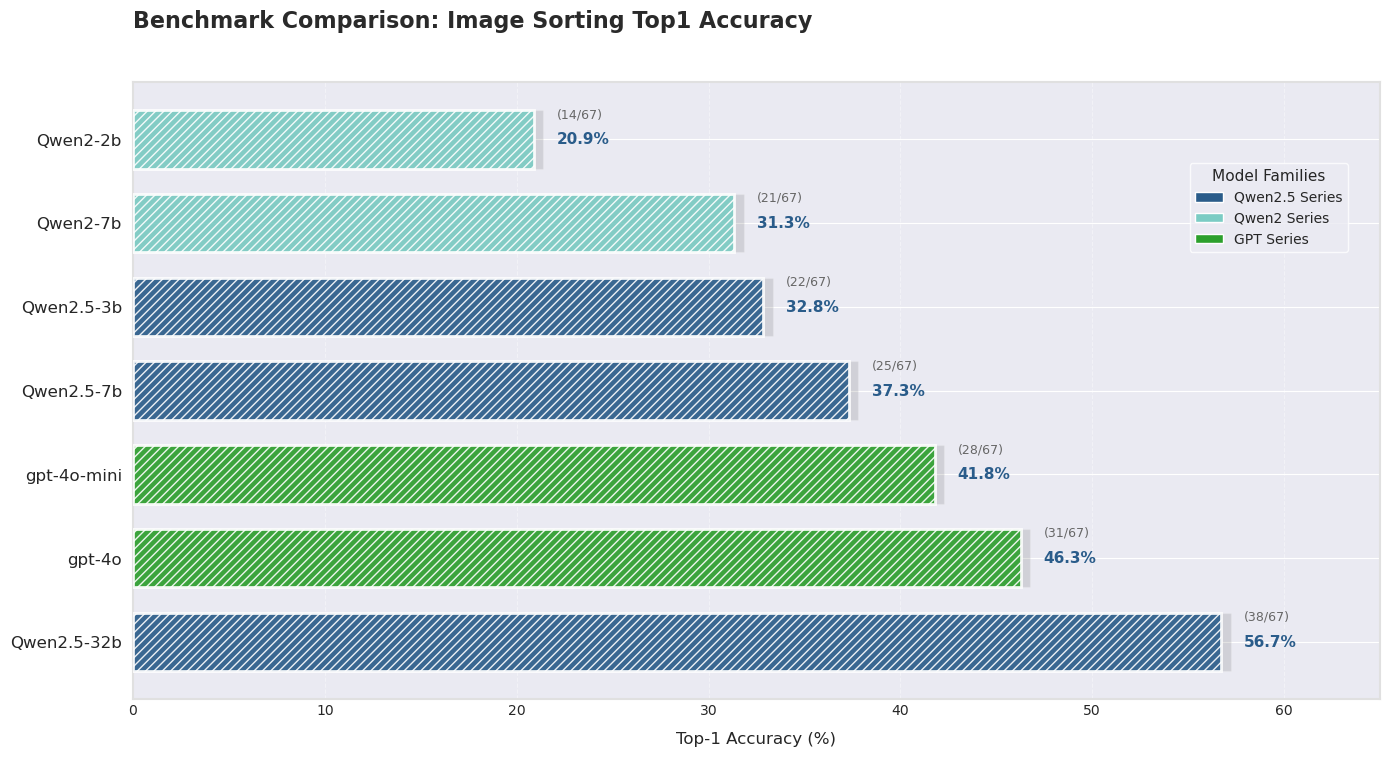

In [8]:
import matplotlib.pyplot as plt
import re
from matplotlib import rcParams
import seaborn as sns
sns.set_style("darkgrid")  # 替换原来的 plt.style.use
# 设置全局样式
rcParams['font.family'] = 'DejaVu Sans'  # 使用更现代的字体系列
print(plt.style.available)
plt.style.use('seaborn-v0_8-darkgrid')

# 原始数据
data = """
Qwen2-2b: 14/67
Qwen2-7b: 21/67
Qwen2.5-3b: 22/67
Qwen2.5-7b: 25/67
Qwen2.5-32b: 38/67
gpt-4o-mini 28/67
gpt-4o: 31/67
"""

# 数据解析
models = []
accuracies = []
for line in data.strip().split('\n'):
    match = re.match(r"([\w.-]+)[:\s]+(\d+)/(\d+)", line)
    if match:
        model = match.group(1)
        correct = int(match.group(2))
        total = int(match.group(3))
        accuracy = correct / total * 100
        models.append(model)
        accuracies.append(accuracy)

# 按准确率排序
sorted_data = sorted(zip(models, accuracies), key=lambda x: -x[1])
sorted_models = [x[0] for x in sorted_data]
sorted_acc = [x[1] for x in sorted_data]

# 高级配色方案
palette = {
    'qwen2.5': {'color': '#2a5c8a', 'gradient': '#6baed6'},  # 深海蓝渐变
    'qwen2': {'color': '#7bccc4', 'gradient': '#bae4bc'},    # 浅蓝绿渐变
    'gpt': {'color': '#2ca02c', 'gradient': '#98df8a'}       # 森林绿渐变
}

# 创建渐变条形图
fig, ax = plt.subplots(figsize=(14, 8), dpi=100)

bars = ax.barh(
    sorted_models,
    sorted_acc,
    height=0.7,
    edgecolor='white',
    linewidth=2,
    zorder=3
)

# 添加渐变颜色和阴影效果
for i, (model, acc) in enumerate(zip(sorted_models, sorted_acc)):
    if 'Qwen2.5' in model:
        color = palette['qwen2.5']
    elif 'Qwen2' in model:
        color = palette['qwen2']
    else:
        color = palette['gpt']
    
    # 设置渐变填充
    bars[i].set_facecolor(color['color'])
    bars[i].set_hatch('////')  # 添加纹理
    bars[i].set_alpha(0.9)
    
    # 添加装饰性阴影
    ax.barh(
        model,
        acc + 0.5,
        height=0.7,
        color='#404040',
        alpha=0.15,
        edgecolor=None,
        zorder=2
    )

# 添加动态数据标签
for i, (acc, model) in enumerate(zip(sorted_acc, sorted_models)):
    ax.text(
        acc + 1.2,
        i,
        f"{acc:.1f}%",
        va='center',
        fontsize=11,
        fontweight='bold',
        color=palette['qwen2.5']['color']
    )
    ax.text(
        acc + 1.2,
        i + 0.3,
        f"({int(acc/100*67)}/67)",
        va='center',
        fontsize=9,
        color='#666666'
    )

# 图表装饰
ax.set_xlim(0, 65)
ax.set_xlabel("Top-1 Accuracy (%)", fontsize=12, labelpad=10)
ax.xaxis.set_tick_params(labelsize=10)
ax.yaxis.set_tick_params(labelsize=12, pad=8)
ax.set_axisbelow(True)
ax.grid(axis='x', linestyle='--', alpha=0.4)

# 添加标题和注释
plt.title(
    "Benchmark Comparison: Image Sorting Top1 Accuracy\n",
    fontsize=16,
    fontweight='bold',
    loc='left',
    pad=20,
    color='#2a2a2a'
)
plt.figtext(
    0.15, 0.92,
    "",
    fontsize=9,
    color='#666666'
)

# 自定义图例
legend_elements = [
    plt.Rectangle((0,0),1,1, 
                  facecolor=palette['qwen2.5']['color'],
                  edgecolor='white',
                  label='Qwen2.5 Series'),
    plt.Rectangle((0,0),1,1,
                  facecolor=palette['qwen2']['color'],
                  edgecolor='white',
                  label='Qwen2 Series'),
    plt.Rectangle((0,0),1,1,
                  facecolor=palette['gpt']['color'],
                  edgecolor='white',
                  label='GPT Series')
]

# 修改位置参数：loc='upper right'，并添加bbox_to_anchor微调
ax.legend(
    handles=legend_elements,
    loc='upper right',
    bbox_to_anchor=(0.98, 0.88),  # 新增坐标锚点
    frameon=True,
    fontsize=10,
    title='Model Families',
    title_fontsize=11,
    edgecolor='white'
)

# 添加装饰性边框
for spine in ax.spines.values():
    spine.set_color('#e0e0e0')
    spine.set_linewidth(1.5)

plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.show()